In [6]:
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import HTML

from EM import EM
from utils import gen_data, plot_single, animate_plot

# Examples testing the EM algorithm under Gaussian Mixture Models
## Example 1
$k = 3$ clusters and $p=2$ dimensions

In [2]:
## Example 1
np.random.seed(1111)

# Generate data from a GMM with 3 clusters and 2 dimensions
k = 3
p = 2
probs = [0.3, 0.5, 0.2]

X, true_means, true_covs = gen_data(k, p, 5000, probs, lim = [-50, 50])

for i in range(k):
    print("Gaussian", i + 1)
    print("weight: ", probs[i])
    print("mean: ", true_means[i])
    print("cov: ")
    print(true_covs[i])
    print("----------------------------------")

Gaussian 1
weight:  0.3
mean:  [-40.44508008  42.50037019]
cov: 
[[3.21543285 3.50252611]
 [3.50252611 5.50623995]]
----------------------------------
Gaussian 2
weight:  0.5
mean:  [-15.64265768 -18.95230581]
cov: 
[[4.81091237 3.29917686]
 [3.29917686 3.13286866]]
----------------------------------
Gaussian 3
weight:  0.2
mean:  [-49.79901601 -26.44052756]
cov: 
[[3.84424958 2.5870179 ]
 [2.5870179  4.24419944]]
----------------------------------


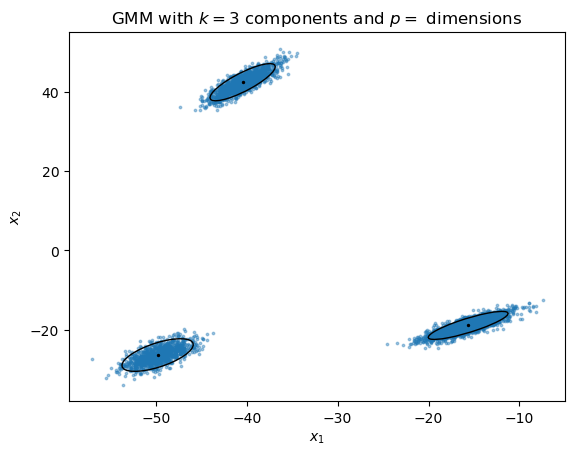

In [3]:
title = r"GMM with $k=3$ components and $p=$ dimensions"
plot_single(X, k, title, true_param = (true_means, true_covs), filename = "Examples/2D case 1/original")

**K-means initialization**

In [4]:
mu, sigma, pi, snapshots, lls = EM(k, p, X, 20, 1e-6, init_kmeans = True)

Initializing under K-Means...


  0%|          | 0/20 [00:00<?, ?it/s]

EM converged at iteration 2!


In [10]:
anim = animate_plot(snapshots, X, k, true_means, true_covs, "Examples/2D case 1/kmeans")
plt.close()
HTML(anim.to_jshtml())

In [18]:
print("EM estimates")
for i in range(k):
    print("Gaussian", i + 1)
    print("weight: ", pi[i])
    print("mean: ", mu[i])
    print("cov: ")
    print(sigma[i])
    print("----------------------------------")

EM estimates
Gaussian 1
weight:  0.4994
mean:  [-15.68903827 -18.98941663]
cov: 
[[4.8055495  3.26066693]
 [3.26066693 3.1212336 ]]
----------------------------------
Gaussian 2
weight:  0.2946
mean:  [-40.46876646  42.40761474]
cov: 
[[3.34420514 3.73352807]
 [3.73352807 5.84389619]]
----------------------------------
Gaussian 3
weight:  0.206
mean:  [-49.70443489 -26.43634014]
cov: 
[[3.72239938 2.63233028]
 [2.63233028 4.45707507]]
----------------------------------


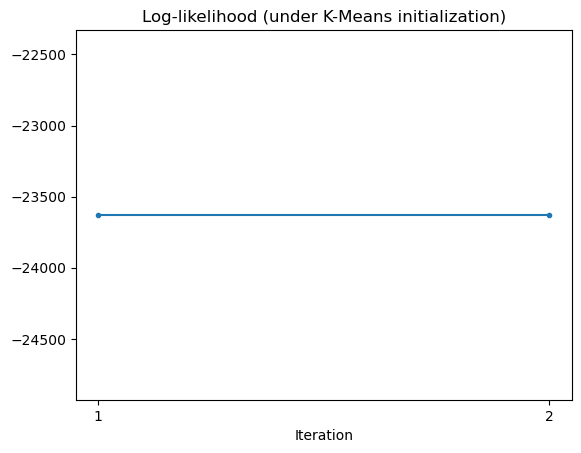

In [12]:
# Plot log-likelihood
plt.plot(range(1, len(lls)), lls[1:], marker='.')
plt.title("Log-likelihood (under K-Means initialization)")
plt.xlabel("Iteration")
plt.xticks(range(1, len(lls)))
plt.show()

**Random from data initialization**

In [13]:
mu, sigma, pi, snapshots, lls = EM(k, p, X, 20, 1e-6, init_kmeans = False)

Initializing under random selection...


  0%|          | 0/20 [00:00<?, ?it/s]

In [14]:
anim = animate_plot(snapshots, X, k, true_means, true_covs, "Examples/2D case 1/random")
plt.close()
HTML(anim.to_jshtml())

In [15]:
print("EM estimates")
for i in range(k):
    print("Gaussian", i + 1)
    print("weight: ", pi[i])
    print("mean: ", mu[i])
    print("cov: ")
    print(sigma[i])
    print("----------------------------------")

EM estimates
Gaussian 1
weight:  0.4993998778588905
mean:  [-15.68903613 -18.98941551]
cov: 
[[4.80553185 3.26065792]
 [3.26065792 3.12122925]]
----------------------------------
Gaussian 2
weight:  0.20600012214110944
mean:  [-49.70441992 -26.43633843]
cov: 
[[3.72277543 2.632372  ]
 [2.632372   4.45707743]]
----------------------------------
Gaussian 3
weight:  0.2946
mean:  [-40.46876646  42.40761474]
cov: 
[[3.34420514 3.73352807]
 [3.73352807 5.84389619]]
----------------------------------


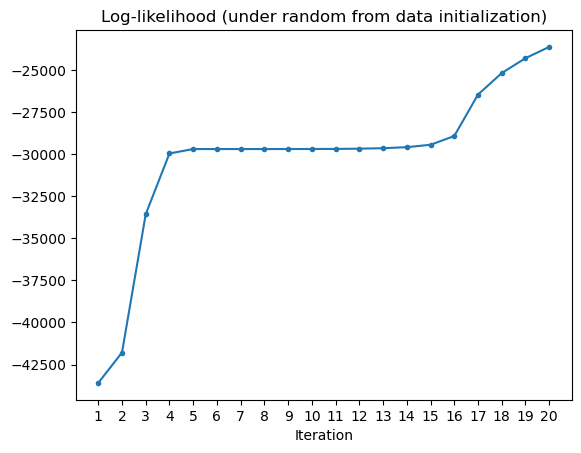

In [16]:
# Plot log-likelihood
plt.plot(range(1, len(lls)), lls[1:], marker='.')
plt.title("Log-likelihood (under random from data initialization)")
plt.xlabel("Iteration")
plt.xticks(range(1, len(lls)))
plt.show()

## Example 2
$k = 3$ clusters and $p=2$ dimensions

In [17]:
## Example 2
np.random.seed(1)

# Generate data from a GMM with 3 clusters and 2 dimensions
k = 3
p = 2
probs = [0.3, 0.5, 0.2]

X, true_means, true_covs = gen_data(k, p, 5000, probs, lim = [-50, 50])

for i in range(k):
    print("Gaussian", i + 1)
    print("weight: ", probs[i])
    print("mean: ", true_means[i])
    print("cov: ")
    print(true_covs[i])
    print("----------------------------------")

Gaussian 1
weight:  0.3
mean:  [-8.29779953 22.03244934]
cov: 
[[2.99654813 3.09455209]
 [3.09455209 4.59233381]]
----------------------------------
Gaussian 2
weight:  0.5
mean:  [-49.98856252 -19.76674274]
cov: 
[[5.23559795 2.64251473]
 [2.64251473 2.50084629]]
----------------------------------
Gaussian 3
weight:  0.2
mean:  [-35.32441092 -40.76614052]
cov: 
[[2.55790586 2.53662095]
 [2.53662095 4.61505524]]
----------------------------------


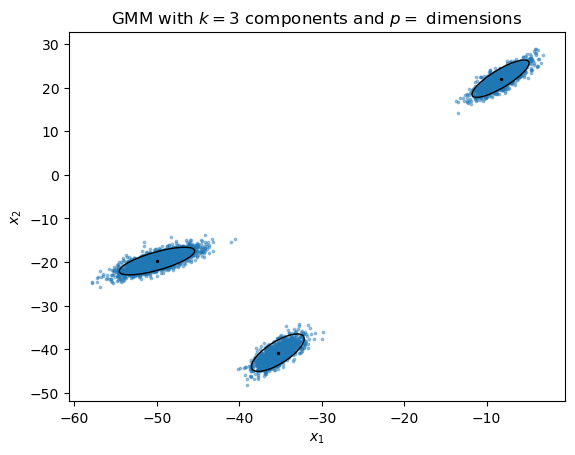

In [19]:
title = r"GMM with $k=3$ components and $p=$ dimensions"
plot_single(X, k, title, true_param = (true_means, true_covs), filename = "Examples/2D case 2/original")

**K-Means initialization**

In [21]:
mu, sigma, pi, snapshots, lls = EM(k, p, X, 20, 1e-6, init_kmeans = True)

Initializing under K-Means...


  0%|          | 0/20 [00:00<?, ?it/s]

EM converged at iteration 2!


In [22]:
anim = animate_plot(snapshots, X, k, true_means, true_covs, "Examples/2D case 2/kmeans")
plt.close()
HTML(anim.to_jshtml())

In [23]:
print("EM estimates")
for i in range(k):
    print("Gaussian", i + 1)
    print("weight: ", pi[i])
    print("mean: ", mu[i])
    print("cov: ")
    print(sigma[i])
    print("----------------------------------")

EM estimates
Gaussian 1
weight:  0.499
mean:  [-49.97450798 -19.74930392]
cov: 
[[5.22876693 2.80247886]
 [2.80247886 2.68771396]]
----------------------------------
Gaussian 2
weight:  0.294
mean:  [-8.23237847 22.07043534]
cov: 
[[2.74538431 2.77484391]
 [2.77484391 4.1678629 ]]
----------------------------------
Gaussian 3
weight:  0.207
mean:  [-35.36250742 -40.87559902]
cov: 
[[2.42929148 2.46242384]
 [2.46242384 4.62927793]]
----------------------------------


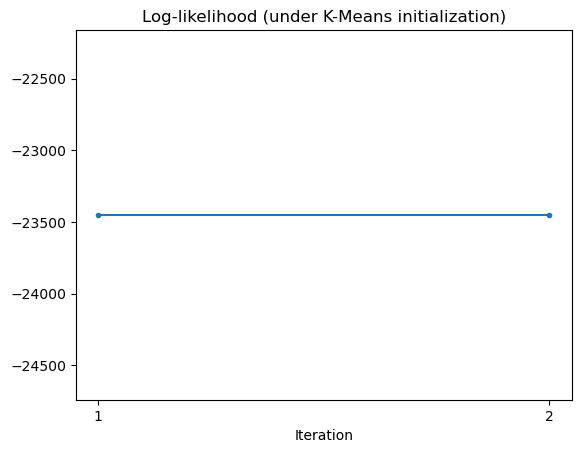

In [24]:
# Plot log-likelihood
plt.plot(range(1, len(lls)), lls[1:], marker='.')
plt.title("Log-likelihood (under K-Means initialization)")
plt.xlabel("Iteration")
plt.xticks(range(1, len(lls)))
plt.show()

**Random from data initialization**

In [25]:
mu, sigma, pi, snapshots, lls = EM(k, p, X, 20, 1e-6, init_kmeans = False)

Initializing under random selection...


  0%|          | 0/20 [00:00<?, ?it/s]

In [26]:
anim = animate_plot(snapshots, X, k, true_means, true_covs, "Examples/2D case 2/random")
plt.close()
HTML(anim.to_jshtml())

In [27]:
print("EM estimates")
for i in range(k):
    print("Gaussian", i + 1)
    print("weight: ", pi[i])
    print("mean: ", mu[i])
    print("cov: ")
    print(sigma[i])
    print("----------------------------------")

EM estimates
Gaussian 1
weight:  0.13598903413445418
mean:  [-8.23224653 22.06733363]
cov: 
[[2.74456299 2.77220801]
 [2.77220801 4.16881179]]
----------------------------------
Gaussian 2
weight:  0.706
mean:  [-45.69025286 -25.94355758]
cov: 
[[ 48.65465384 -61.26990066]
 [-61.26990066  95.74983507]]
----------------------------------
Gaussian 3
weight:  0.15801096586554553
mean:  [-8.23249202 22.07310477]
cov: 
[[2.74609114 2.7771131 ]
 [2.7771131  4.16703084]]
----------------------------------


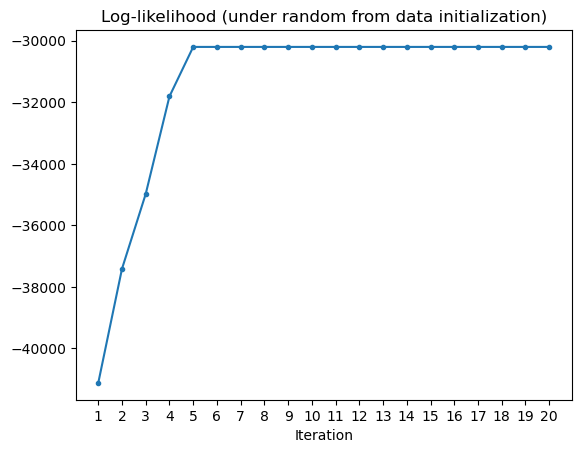

In [28]:
# Plot log-likelihood
plt.plot(range(1, len(lls)), lls[1:], marker='.')
plt.title("Log-likelihood (under random from data initialization)")
plt.xlabel("Iteration")
plt.xticks(range(1, len(lls)))
plt.show()

### Example 3
$k = 4$ clusters and $p=3$ dimensions

In [42]:
## Example 3
np.random.seed(1234)

# Generate data from a GMM with 4 clusters and 3 dimensions
k = 4
p = 3
probs = [0.2, 0.3, 0.3, 0.2]

X, true_means, true_covs = gen_data(k, p, 5000, probs, lim = [-50, 50])

for i in range(k):
    print("Gaussian", i + 1)
    print("weight: ", probs[i])
    print("mean: ", true_means[i])
    print("cov: ")
    print(true_covs[i])
    print("----------------------------------")

Gaussian 1
weight:  0.2
mean:  [-30.84805496  12.2108771   -6.2272261 ]
cov: 
[[4.58100941 4.02367452 2.7152851 ]
 [4.02367452 5.13268768 2.90279341]
 [2.7152851  2.90279341 2.84684934]]
----------------------------------
Gaussian 2
weight:  0.3
mean:  [ 28.53585837  27.99758081 -22.74073947]
cov: 
[[5.79663922 3.43435588 4.42211048]
 [3.43435588 3.50741948 2.92632845]
 [4.42211048 2.92632845 4.53958695]]
----------------------------------
Gaussian 3
weight:  0.3
mean:  [-22.35357449  30.18721775  45.81393537]
cov: 
[[5.14952706 3.70729243 3.91515326]
 [3.70729243 4.57311451 3.02505554]
 [3.91515326 3.02505554 4.4289102 ]]
----------------------------------
Gaussian 4
weight:  0.2
mean:  [ 37.59326347 -14.218273     0.09951255]
cov: 
[[3.57221306 2.37986685 3.98231909]
 [2.37986685 4.38900709 4.72353166]
 [3.98231909 4.72353166 7.17054494]]
----------------------------------


**K-Means initialization**

In [ ]:
mu, sigma, pi, snapshots, lls = EM(k, p, X, 50, 1e-6, init_kmeans = True)

Initializing under K-Means...


  0%|          | 0/20 [00:00<?, ?it/s]

EM converged at iteration 2!


In [35]:
print("EM estimates")
for i in range(k):
    print("Gaussian", i + 1)
    print("weight: ", pi[i])
    print("mean: ", mu[i])
    print("cov: ")
    print(sigma[i])
    print("----------------------------------")

EM estimates
Gaussian 1
weight:  0.3154
mean:  [ 4.51889581 -7.61459958 14.6123159 ]
cov: 
[[2.54126069 1.75847773 1.67626547]
 [1.75847773 4.91086277 2.65532062]
 [1.67626547 2.65532062 2.81387797]]
----------------------------------
Gaussian 2
weight:  0.3868
mean:  [-6.21444359 39.21192499 46.41455811]
cov: 
[[3.31825349 3.22731204 3.18054595]
 [3.22731204 5.32642315 5.01259781]
 [3.18054595 5.01259781 5.63426525]]
----------------------------------
Gaussian 3
weight:  0.203
mean:  [ 4.92077981 21.60340356 10.31861744]
cov: 
[[5.3961654  2.97164733 3.17476839]
 [2.97164733 3.93355286 3.31043476]
 [3.17476839 3.31043476 3.8706383 ]]
----------------------------------
Gaussian 4
weight:  0.0948
mean:  [-11.79309845  28.96334499   2.7369938 ]
cov: 
[[3.12148408 3.37684498 3.24583657]
 [3.37684498 5.09056435 3.91653794]
 [3.24583657 3.91653794 4.79508605]]
----------------------------------


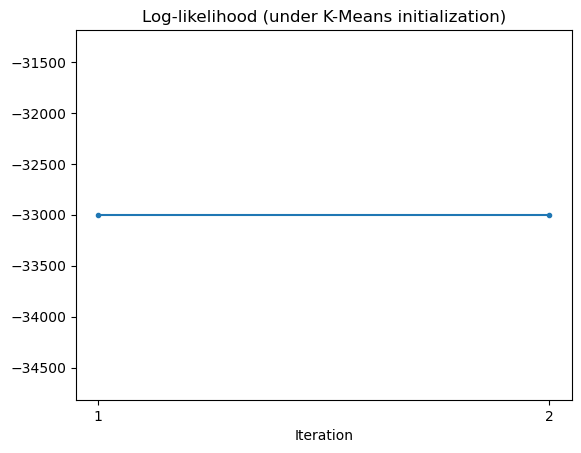

In [36]:
# Plot log-likelihood
plt.plot(range(1, len(lls)), lls[1:], marker='.')
plt.title("Log-likelihood (under K-Means initialization)")
plt.xlabel("Iteration")
plt.xticks(range(1, len(lls)))
plt.show()

**Random from data initialization**

In [43]:
mu, sigma, pi, snapshots, lls = EM(k, p, X, 50, 1e-6, init_kmeans = False)

Initializing under random selection...


  0%|          | 0/50 [00:00<?, ?it/s]

EM converged at iteration 21!


In [44]:
print("EM estimates")
for i in range(k):
    print("Gaussian", i + 1)
    print("weight: ", pi[i])
    print("mean: ", mu[i])
    print("cov: ")
    print(sigma[i])
    print("----------------------------------")

EM estimates
Gaussian 1
weight:  0.3042
mean:  [ 28.50360451  28.01311823 -22.77540379]
cov: 
[[5.85047774 3.41680497 4.46232446]
 [3.41680497 3.48518082 2.89449276]
 [4.46232446 2.89449276 4.50299112]]
----------------------------------
Gaussian 2
weight:  0.2914
mean:  [-22.37836388  30.1563024   45.85063502]
cov: 
[[5.17938414 3.75722081 3.89564633]
 [3.75722081 4.59443085 3.05729029]
 [3.89564633 3.05729029 4.41143479]]
----------------------------------
Gaussian 3
weight:  0.2002
mean:  [-30.80811576  12.23659367  -6.19080811]
cov: 
[[4.57947439 3.90153426 2.68918687]
 [3.90153426 4.89931868 2.76964227]
 [2.68918687 2.76964227 2.92230095]]
----------------------------------
Gaussian 4
weight:  0.2042
mean:  [ 37.64982941 -14.22471457   0.22265946]
cov: 
[[3.50037576 2.39208439 3.91093861]
 [2.39208439 4.23480725 4.58936252]
 [3.91093861 4.58936252 6.97787477]]
----------------------------------


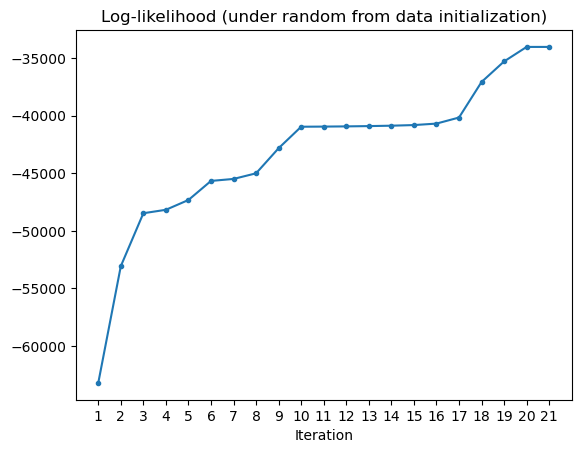

In [45]:
# Plot log-likelihood
plt.plot(range(1, len(lls)), lls[1:], marker='.')
plt.title("Log-likelihood (under random from data initialization)")
plt.xlabel("Iteration")
plt.xticks(range(1, len(lls)))
plt.show()